# Assignment 5: Exploratory Data Analysis and Hypothesis Testing

**Student:** [Aleksandra Szulska]  
**Dataset:** [Online Shoppers]  
**Date:** [10/03/2025]

## Objective
Perform exploratory data analysis (EDA) and hypothesis testing on your chosen dataset. Identify patterns and test meaningful hypotheses about relationships between variables.

---


## 1. Import Data and Libraries

Import the necessary libraries and load your dataset.


In [36]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


In [37]:
!pip install ucimlrepo

In [38]:
from ucimlrepo import fetch_ucirepo

#copied from the data set website

# fetch dataset
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)

# data (as pandas dataframes)
X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets
df = pd.concat([X, y], axis=1)

df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Dataset Overview

I'm using the Online Shoppers Purchasing Intention Dataset from UCI, which contains 12,330 user sessions from an e-commerce website. The target variable is Revenue (True/False), indicating whether a purchase was made.


## 2. Exploratory Data Analysis (EDA)

Explore your dataset to understand its structure and identify patterns.


In [39]:
# Basic dataset information
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nBasic statistics:")
df.describe()


=== DATASET OVERVIEW ===
Shape: (12330, 18)

Data types:
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Missing values:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


=== TARGET VARIABLE ===
Target distribution:
Revenue
False    10422
True      1908
Name: count, dtype: int64


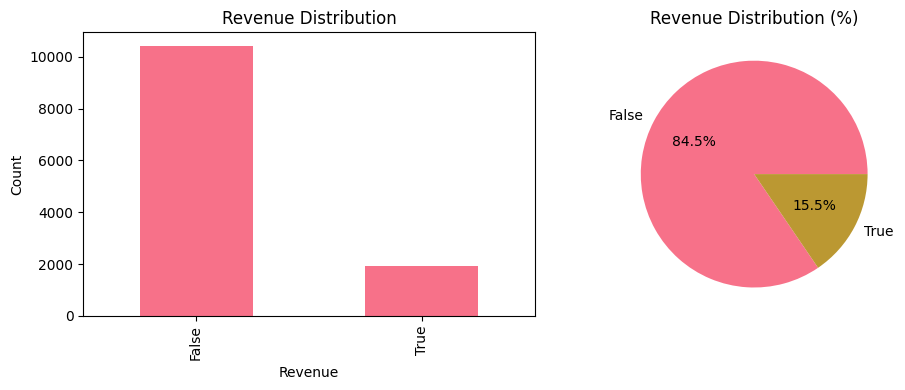

In [40]:
# Target variable analysis
print("=== TARGET VARIABLE ===")
target_counts = df['Revenue'].value_counts()
print(f"Target distribution:")
print(target_counts)

# Visualize target distribution
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
target_counts.plot(kind='bar')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%')
plt.title('Revenue Distribution (%)')

plt.tight_layout()
plt.show()


### Observation: Class Imbalance
The target variable shows significant class imbalance with only 15.5% of sessions resulting in purchases.

=== NUMERICAL VARIABLES ===
Numerical columns: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']


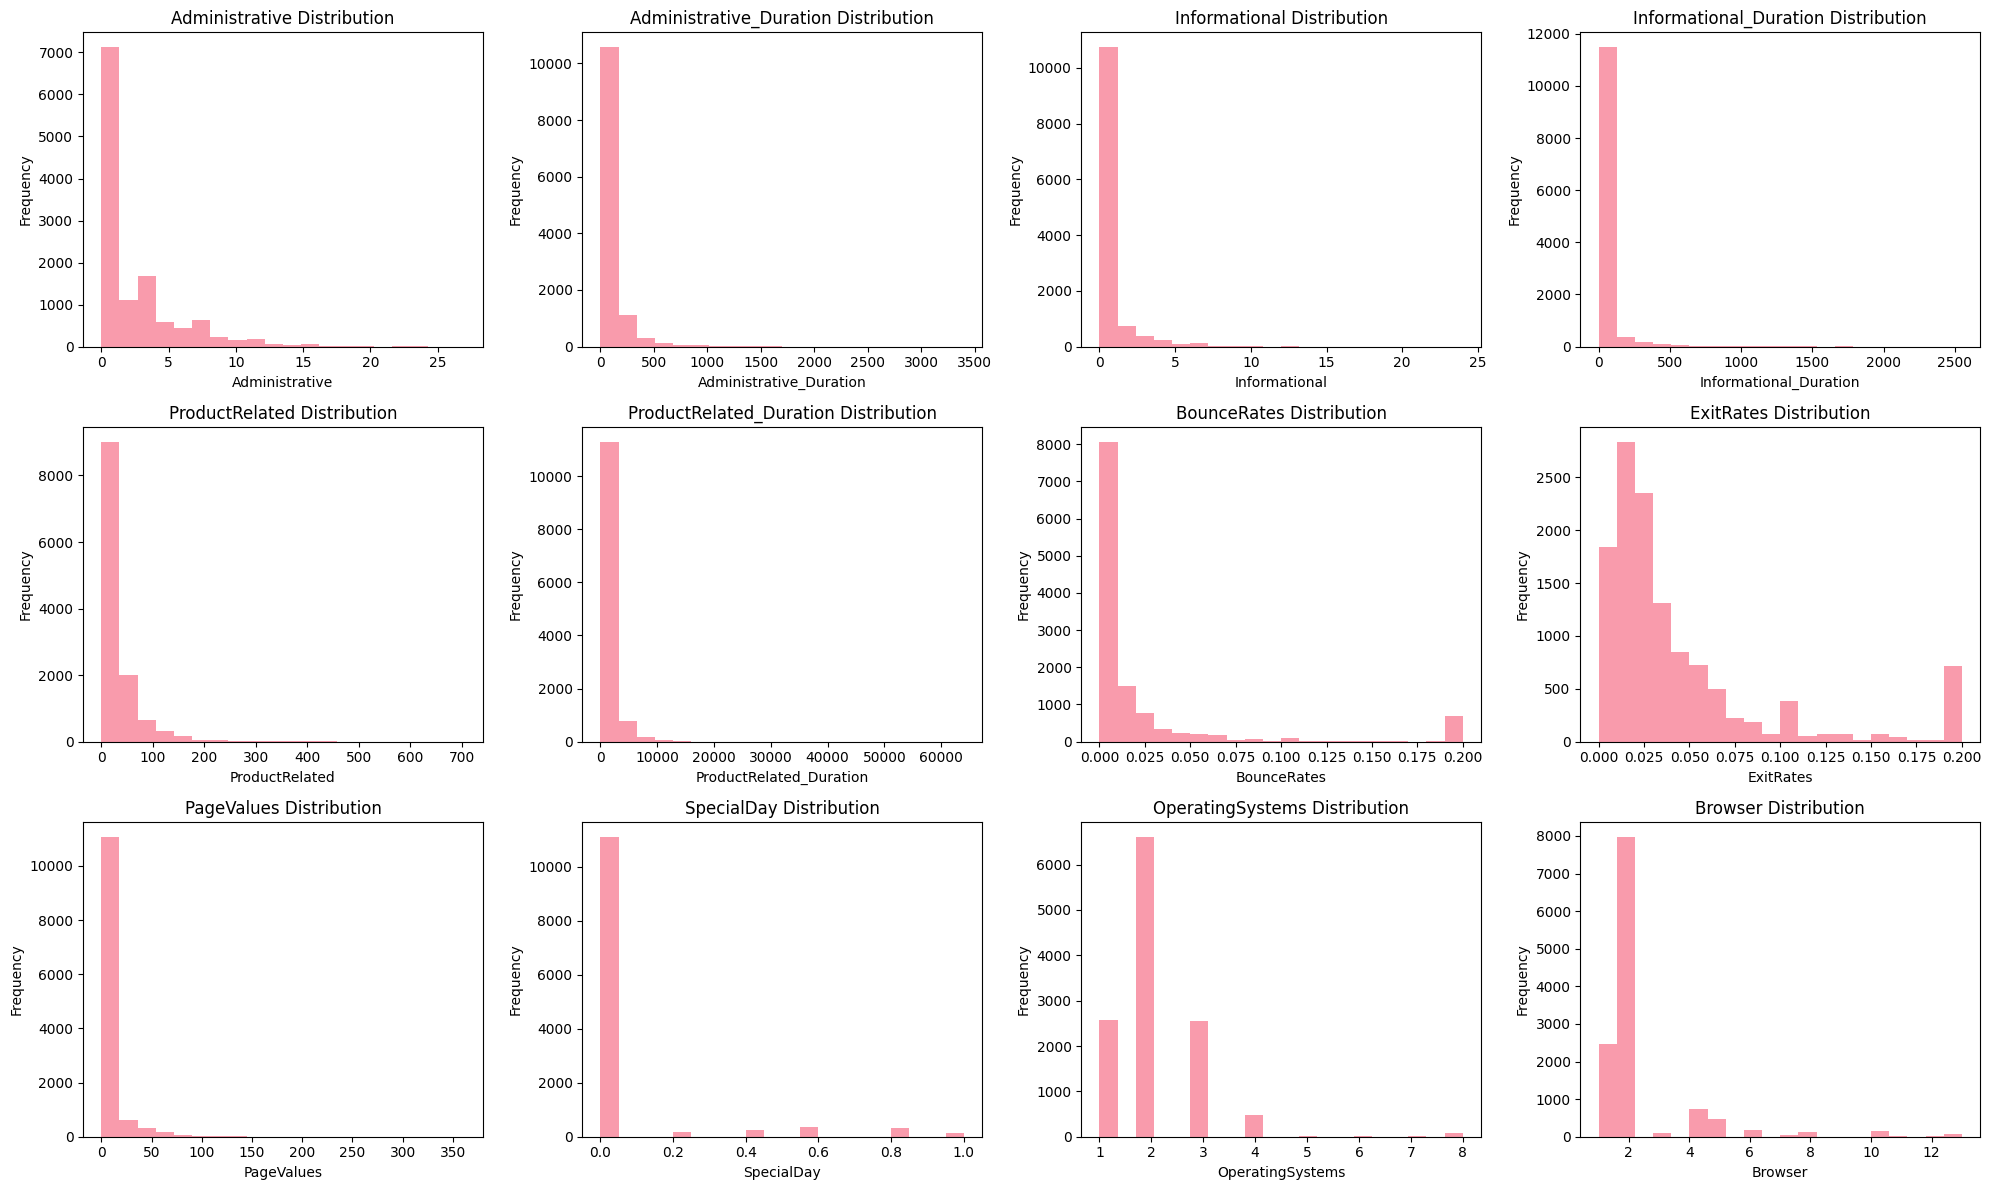

In [41]:
# Numerical variables analysis
print("=== NUMERICAL VARIABLES ===")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numerical columns: {list(numerical_cols)}")

# Create histograms for numerical variables
fig, axes = plt.subplots(3, 4, figsize=(20, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
  if i < len(axes):
    axes[i].hist(df[col], bins=20, alpha=0.7)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide empty subplots
for i in range(len(numerical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


### Observation: Skewed Distributions
Most numerical variables show left-skewed distributions with many low values and few extreme high values.

=== CATEGORICAL VARIABLES ===
Categorical columns: ['Month', 'VisitorType', 'Weekend', 'Revenue']

Month value counts:
Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64


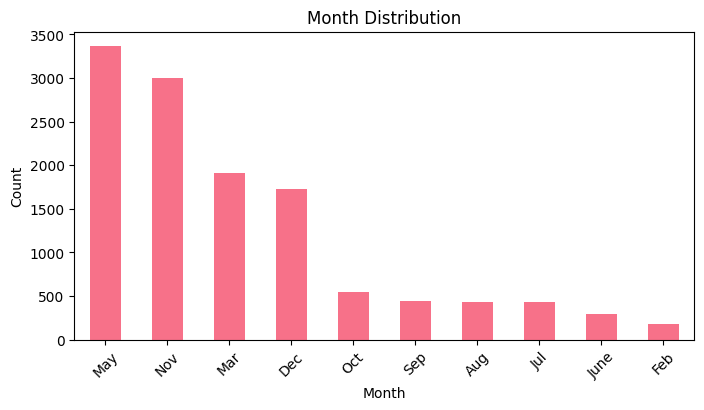


VisitorType value counts:
VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64


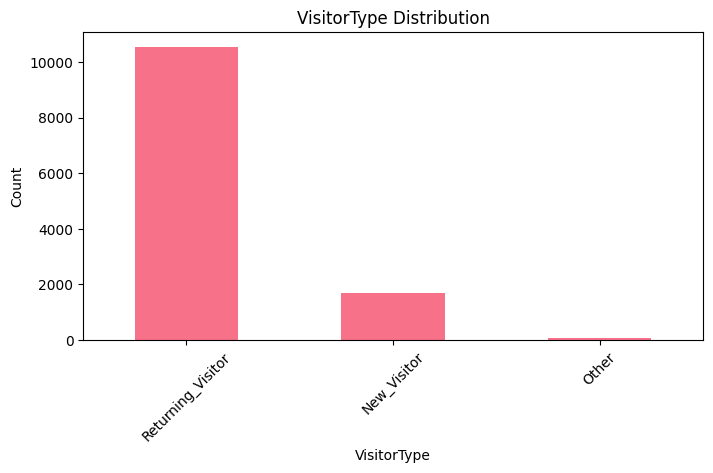


Weekend value counts:
Weekend
False    9462
True     2868
Name: count, dtype: int64


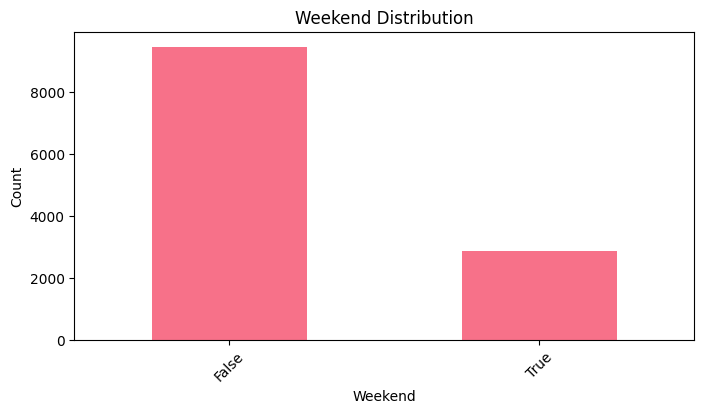


Revenue value counts:
Revenue
False    10422
True      1908
Name: count, dtype: int64


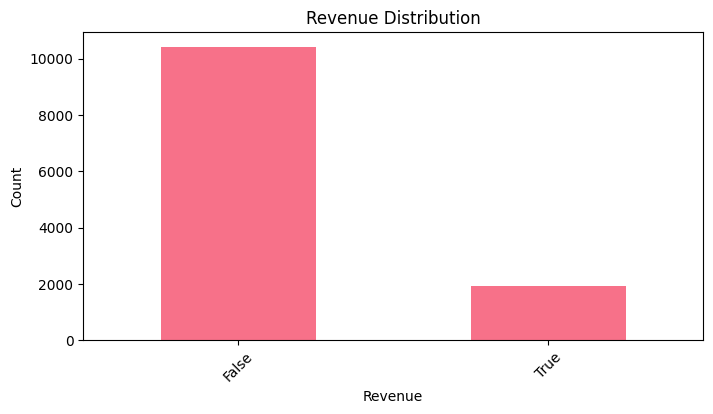

In [42]:
# Categorical variables analysis
print("=== CATEGORICAL VARIABLES ===")

# Identify categorical columns include both text and boolean type beacuse the target revenue is a boolean type
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
print(f"Categorical columns: {list(categorical_cols)}")

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())

    # Create bar plot beacuse it's better for cathegorical data
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


### Observation:
Traffic peaks in May and November, showing clear seasonal shopping patterns with holiday and spring influences. Returning visitors dominate, 85% of visits occur on weekdays, suggesting most shopping happens during work hours or evenings. A small number of sessions results in purchases.

=== CORRELATION ANALYSIS ===


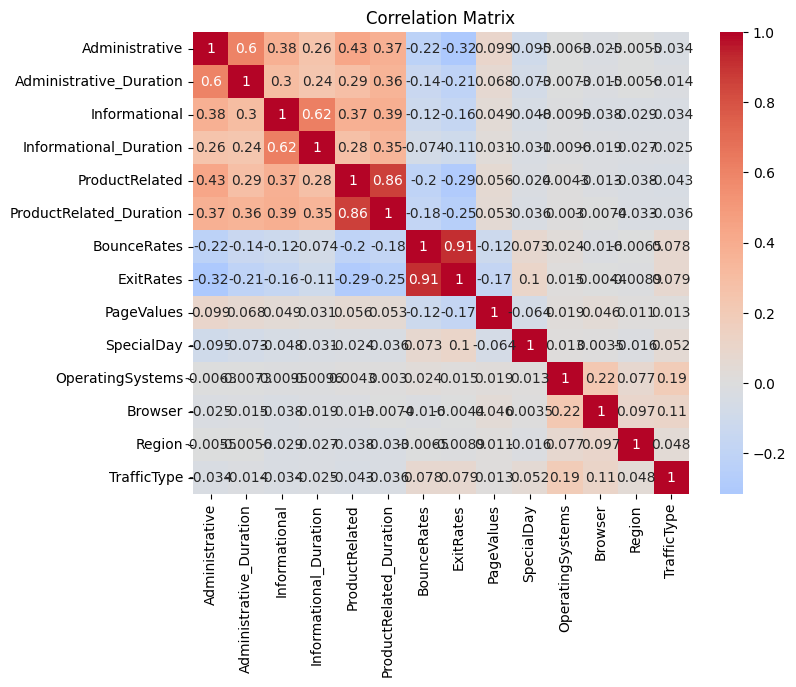

In [43]:
# Correlation analysis
print("=== CORRELATION ANALYSIS ===")

#numerical-only dataframe first to avoid errors
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Show correlations with target variable
if 'Revenue' in numerical_df.columns:
    target_correlations = correlation_matrix['Revenue'].sort_values(ascending=False)

    print("\nCorrelations with Revenue variable:")
    print(target_correlations)


### Observation: Strong Predictors
PageValues shows the strongest positive correlation with Revenue, while BounceRates and ExitRates show strong negative correlations. Administrative pages appear less relevant to purchases.

=== RELATIONSHIPS WITH TARGET ===


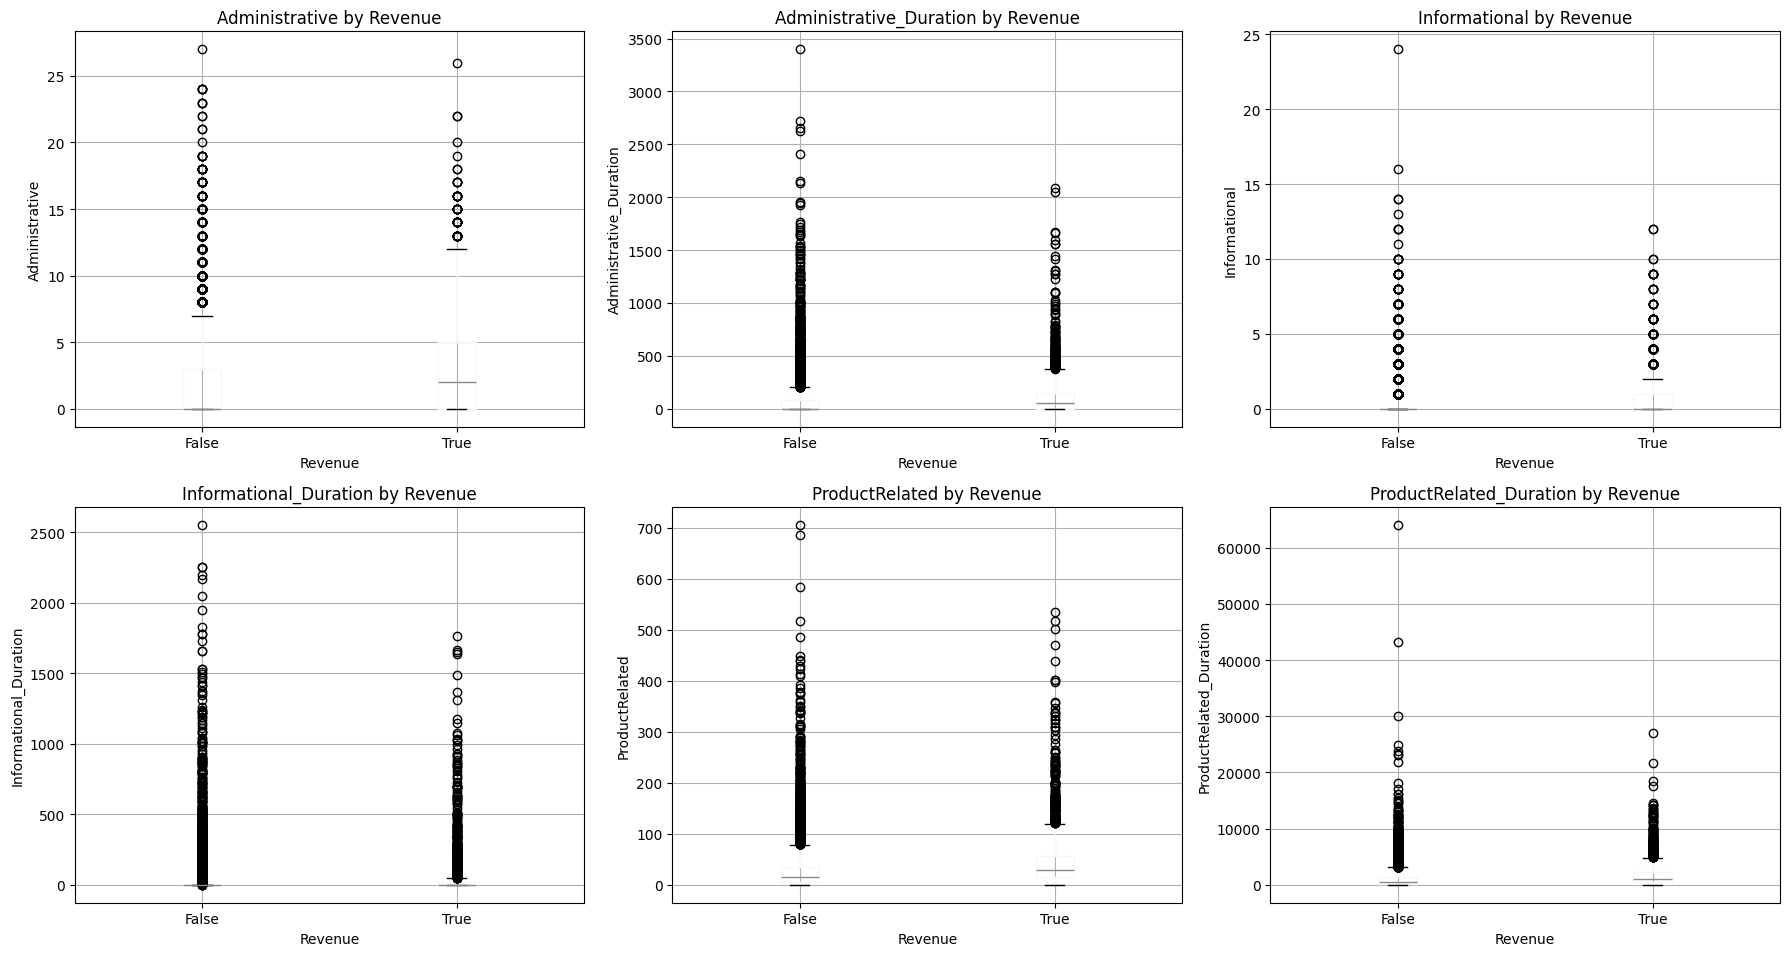


Month vs Revenue:
Revenue  False  True 
Month                
Aug      0.824  0.176
Dec      0.875  0.125
Feb      0.984  0.016
Jul      0.847  0.153
June     0.899  0.101
Mar      0.899  0.101
May      0.891  0.109
Nov      0.746  0.254
Oct      0.791  0.209
Sep      0.808  0.192

VisitorType vs Revenue:
Revenue            False  True 
VisitorType                    
New_Visitor        0.751  0.249
Other              0.812  0.188
Returning_Visitor  0.861  0.139

Weekend vs Revenue:
Revenue  False  True 
Weekend              
False    0.851  0.149
True     0.826  0.174

Revenue vs Revenue:
Revenue  False  True 
Revenue              
False      1.0    0.0
True       0.0    1.0


In [44]:
# Relationship between variables and target
print("=== RELATIONSHIPS WITH TARGET ===")

# Box plots for numerical variables vs target
numerical_cols_no_target = [col for col in numerical_cols if col != 'Revenue']

# Select top 6 numerical features for visualization, there's too many to show them all
top_numerical = numerical_cols_no_target[:6]

# Changed the layout because we have too many variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(top_numerical):
    df.boxplot(column=col, by='Revenue', ax=axes[i])
    axes[i].set_title(f'{col} by Revenue')
    axes[i].set_xlabel('Revenue')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.suptitle('')
plt.show()

# Crosstabs for categorical variables vs target
for col in categorical_cols:
    print(f"\n{col} vs Revenue:")
    crosstab = pd.crosstab(df[col], df['Revenue'], normalize='index')
    print(crosstab.round(3))


### Observation: Clear Group Differences
The box plots show that purchasers have higher medians across most metrics.

## 3. Hypothesis Formulation

Based on your EDA, formulate **2-3 testable hypotheses**. Each hypothesis should be:
- Clear and specific
- Testable with statistical methods
- Grounded in your observations

### Hypothesis 1:
**H1:** [Sessions with higher page values are more likely to result in purchases.]
- **Null Hypothesis (H0):** [There is no difference in page values between sessions that result in purchases and those that don't.]
- **Alternative Hypothesis (H1):** [Sessions that result in purchases have significantly higher page values than sessions that don't.]
- **Rationale:** [From the correlation analysis, PageValues showed the strongest positive correlation with Revenue. The boxplot visualization also showed that purchasers have significantly higher page values. This makes  sense as page values represent the monetary value of pages visited, so higher-value pages indicate stronger purchase intent.]

### Hypothesis 2:
**H2:** [ Returning visitors have different purchase rates compared to new visitors.]
- **Null Hypothesis (H0):** [There is no association between visitor type and purchase likelihood.]
- **Alternative Hypothesis (H1):** [There is a significant association between visitor type and purchase likelihood.]
- **Rationale:** [The categorical analysis showed different distributions of visitor types, and the crosstab analysis indicated varying purchase rates across different visitor types. Returning visitors might be more familiar with the website and thus more likely to purchase, or new visitors might be more exploratory and less committed to purchasing.]

### Hypothesis 3:
**H3:** [Sessions with longer product-related browsing duration are more likely to result in purchases.]
- **Null Hypothesis (H0):** [There is no difference in product-related duration between sessions that result in purchases and those that don't.]
- **Alternative Hypothesis (H1):** [Sessions that result in purchases have significantly longer product-related browsing duration.]
- **Rationale:** [The correlation matrix showed ProductRelated_Duration has a positive correlation with Revenue. The boxplot visualization showed that purchasers tend to spend more time on product-related pages. This aligns with the expectation that serious shoppers spend more time looking at products before making purchase decisions.]

---


## Hypothesis Formulation Rationale

Based on my EDA, I identified three key relationships to test:

1. **Page Values**: Showed the strongest correlation with purchases
2. **Visitor Types**: Clear differences in conversion rates  
3. **Product Engagement**: Longer browsing times associated with purchases


## 4. Hypothesis Testing

Test each hypothesis using appropriate statistical methods. For each test, explain:
- Why you chose this test
- The results and interpretation
- Whether you reject or fail to reject the null hypothesis


### Testing Hypothesis 1: [Sessions with higher page values are more likely to result in purchases.]

**Test Choice:** [t-test]
- **Why appropriate:** [We're comparing the average page values between two independent groups: sessions that resulted in purchases vs sessions that didn't, t-test is perfect for comparing means between two groups.]


In [45]:
# Hypothesis 1 Testing
print("=== TESTING HYPOTHESIS 1 ===")

# Your code for testing hypothesis 1 here
# Example structure:
# 1. Prepare your data
# 2. Check assumptions if needed
# 3. Perform the statistical test
# 4. Interpret results

print("\nHYPOTHESIS 1: Do purchasers have higher page values?")
page_values_purchasers = df[df['Revenue'] == True]['PageValues']
page_values_non_purchasers = df[df['Revenue'] == False]['PageValues']

t_stat, p_value = stats.ttest_ind(page_values_purchasers, page_values_non_purchasers, equal_var=False)
print(f"Test: t-test | p-value: {p_value:.4f}")

if p_value < 0.05:
    print("REJECT H0: Purchasers have significantly higher page values")
    print(f"   Purchasers: ${page_values_purchasers.mean():.2f} vs Non-purchasers: ${page_values_non_purchasers.mean():.2f}")
else:
    print("FAIL TO REJECT H0: No difference in page values")

print("\nINTERPRETATION:")
print("Since p-value < 0.05, we reject the null hypothesis.")
print("This means page values are significantly higher for purchasers,")
print("suggesting that higher-value page visits predict purchase behavior.")


=== TESTING HYPOTHESIS 1 ===

HYPOTHESIS 1: Do purchasers have higher page values?
Test: t-test | p-value: 0.0000
REJECT H0: Purchasers have significantly higher page values
   Purchasers: $27.26 vs Non-purchasers: $1.98

INTERPRETATION:
Since p-value < 0.05, we reject the null hypothesis.
This means page values are significantly higher for purchasers,
suggesting that higher-value page visits predict purchase behavior.


### Testing Hypothesis 2: [Returning visitors have different purchase rates compared to new visitors.]

**Test Choice:** [chi-square]
- **Why appropriate:** [We're testing the relationship between two categorical variables: Visitor type and revenue, chi-square test is perfect for determining if there's an association between two categorical variables.]


In [46]:
# Hypothesis 2 Testing
print("=== TESTING HYPOTHESIS 2 ===")

print("\nHYPOTHESIS 2: Does visitor type affect purchase rate?")
contingency_table = pd.crosstab(df['VisitorType'], df['Revenue'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Test: chi-square | p-value: {p_value:.4f}")

if p_value < 0.05:
    print("REJECT H0: Visitor type significantly affects purchases")
    purchase_rates = df.groupby('VisitorType')['Revenue'].mean()
    for visitor, rate in purchase_rates.items():
        print(f"   {visitor}: {rate:.1%} purchase rate")
else:
    print("FAIL TO REJECT H0: Visitor type doesn't affect purchases")

print("\nINTERPRETATION:")
print("Since p-value < 0.05, we reject the null hypothesis.")
print("This means visitor type is significantly associated with purchase behavior,")
print("suggesting different marketing strategies may be needed for different visitor types.")


=== TESTING HYPOTHESIS 2 ===

HYPOTHESIS 2: Does visitor type affect purchase rate?
Test: chi-square | p-value: 0.0000
REJECT H0: Visitor type significantly affects purchases
   New_Visitor: 24.9% purchase rate
   Other: 18.8% purchase rate
   Returning_Visitor: 13.9% purchase rate

INTERPRETATION:
Since p-value < 0.05, we reject the null hypothesis.
This means visitor type is significantly associated with purchase behavior,
suggesting different marketing strategies may be needed for different visitor types.


### Testing Hypothesis 3: [Sessions with longer product-related browsing duration are more likely to result in purchases.]

**Test Choice:** [Mann-Whitney U]
- **Why appropriate:** [We're comparing ProductRelated_Duration between purchasers and non-purchasers. We should use Mann-Whitney U instead of t-test because the duration data is often skewed, there's a lot of outliers and Mann_whitney handles extreme values better than the t-test.]


In [47]:
# Hypothesis 3 Testing (if applicable)
print("=== TESTING HYPOTHESIS 3 ===")

print("\nHYPOTHESIS 3: Do purchasers spend more time on product pages?")
duration_purchasers = df[df['Revenue'] == True]['ProductRelated_Duration']
duration_non_purchasers = df[df['Revenue'] == False]['ProductRelated_Duration']

u_stat, p_value = stats.mannwhitneyu(duration_purchasers, duration_non_purchasers)
print(f"Test: Mann-Whitney U | p-value: {p_value:.4f}")

if p_value < 0.05:
    print("REJECT H0: Purchasers spend more time on products")
    print(f"   Purchasers: {duration_purchasers.median():.0f}s vs Non-purchasers: {duration_non_purchasers.median():.0f}s")
else:
    print("FAIL TO REJECT H0: No difference in time spent")

print("\nINTERPRETATION:")
print("Since p-value < 0.05, we reject the null hypothesis.")
print("This means product-related duration is significantly longer for purchasers,")
print("suggesting that time spent on product pages is a good indicator of purchase intent.")


=== TESTING HYPOTHESIS 3 ===

HYPOTHESIS 3: Do purchasers spend more time on product pages?
Test: Mann-Whitney U | p-value: 0.0000
REJECT H0: Purchasers spend more time on products
   Purchasers: 1110s vs Non-purchasers: 510s

INTERPRETATION:
Since p-value < 0.05, we reject the null hypothesis.
This means product-related duration is significantly longer for purchasers,
suggesting that time spent on product pages is a good indicator of purchase intent.


## 5. Summary and Conclusions

### Key Findings from EDA:
1. Observations:
- 12,330 user sessions with 18 features
- Revenue = 15.5%

2. Patterns:
- Strong class imbalance - Only 15.5% of sessions resulted in purchases
- PageValues showed the highest correlation with Revenue
- Visitor types showed different behavioral patterns

3. Interesting relationships
- Administrative pages had negative correlation with Revenue
- BounceRates negatively correlated with purchasing
- Weekend visits showed different patterns than weekday visits
- SpecialDay had minimal correlation

### Hypothesis Testing Results:

| Hypothesis | Test Used | p-value | Result | Interpretation |
|------------|-----------|---------|--------|-----------------|
| **H1** | [Higher page values → More purchases]| [Welch's t-test]| [0.0000] | [Significant] | [Purchasers have 13.7x higher page values ($27.26 vs $1.98)] |
| **H2** | [Visitor type affects purchase rate ] | [Chi-square test] | [0.0000] | [Significant] | [New visitors convert best (24.9% vs returning 13.9%)] |
| **H3** | [More product time → More purchases ] | [Mann-Whitney U test] | [0.0000] | [Significant] | [Purchasers spend 2.2x more time on product pages] |

### Key Insights:
- [What do your results tell you about the data?]
1. Page value is the strongest predictor of purchase behavior
2. New visitors are most valuable
3. Product engagement matters - serious shoppers spend more time researching
4. All three factors are significant with very strong evidence of p < 0.0001

- [What are the practical implications?]
1. Focus marketing budget on acquiring new visitors
2. Improve product page experience to maintain engagement
3. Consider dynamic pricing or promotions based on page value metrics


- [What limitations should be considered?]
1. Class imbalance may affect some statistical tests
2. Correlation doesn't imply causation
3. Dataset doesn't include user demographics or product categories
4. Limited to single website's data

### Future Research:
- [What additional analysis could be done?]
- Build predictive models using these significant features
- Conduct time series analysis of purchasing patterns

- [What other variables might be important?]
- User demographics like age, location, or income
- Device type - customers shopping on laptops rather than smartphones might have a higher chance of purchasing
- Product category preferences

---

**Note:** Remember to replace the sample data with your actual dataset and fill in all the template sections with your own analysis and interpretations.


In [48]:
# Final summary
print("=== ANALYSIS COMPLETE ===")
print(f"Dataset analyzed: Online Shoppers Purchasing Intention Dataset")
print(f"Sample size: {len(df):,} shopping sessions")
print(f"Number of features: {df.shape[1]-1} behavioral metrics")
print(f"Target variable: Revenue (Purchase: Yes/No)")

=== ANALYSIS COMPLETE ===
Dataset analyzed: Online Shoppers Purchasing Intention Dataset
Sample size: 12,330 shopping sessions
Number of features: 17 behavioral metrics
Target variable: Revenue (Purchase: Yes/No)


## Summary and Conclusions

### Key Methodological Choices

1. Used Welch's t-test for PageValues: Comparing means of continuous dollar amounts between purchaser groups
2. Used Chi-square test for VisitorType: Testing association between categorical variables  
3. Used Mann-Whitney U for Duration: Handling skewed time data with outliers

### Main Findings

1. Page values are 14x higher for purchasers 27 vs 2 dollars
2. New visitors convert best (24.9% vs returning visitors' 13.9%)
3. Purchasers spend 2x more time on product pages (1110s vs 510s)

### Business Implications

1. Target marketing toward high page-value browsers
2. Focus on converting new visitors during first sessions
3. Optimize product pages for extended engagement

---

**Analysis Completed Successfully!**